**Madaline Rule I (MRI)**:

MRI is a supervised learning algorithm designed for multi-layer, feedforward networks with adaptive linear neurons.
The MRI algorithm updates the weights of the neurons based on the Least Mean Square (LMS) error correction rule.
During training, it adjusts weights to minimize the output error, reducing the difference between predicted and target values.
The algorithm stops adjusting weights when it reaches an acceptable error level or if further weight changes are insignificant.

**Madaline Rule II (MRII)**:

MRII introduces a more efficient training method for Madaline networks by selectively changing the weights.
Instead of updating weights for all neurons, MRII chooses a subset of neurons to update, reducing computation time and improving convergence.
This algorithm is often preferred for networks with multiple hidden layers, providing a faster training process than MRI in complex networks.


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np

## Data Processing and Loading

In [2]:
# Load the dataset
df = pd.read_csv('Question3.csv', header=None)

# Assign column names for clarity
df.columns = ['Feature1', 'Feature2', 'Class']

## Scatter Plot of the Data

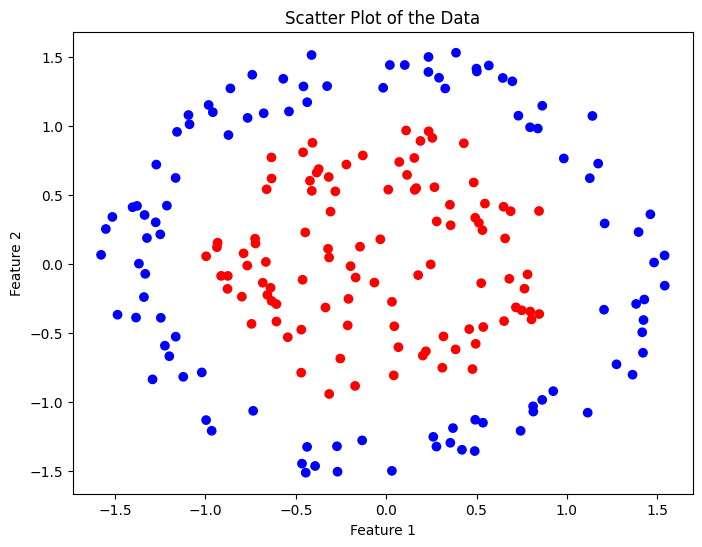

In [3]:
# Map class labels to colors
colors = {0.0: 'red', 1.0: 'blue', 2.0: 'green'}

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Class'].map(colors))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of the Data')
plt.show()

# Prepare the Data
X = df[['Feature1', 'Feature2']].values
y = df['Class'].values

## Function to Plot Decision Boundaries

In [4]:
def plot_decision_boundary(clf, X, y, title):
    # Create a mesh to plot the decision boundary
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class labels for all points in the mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.unique(y).size - 1, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

## Train the Model with Different Neuron Counts

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


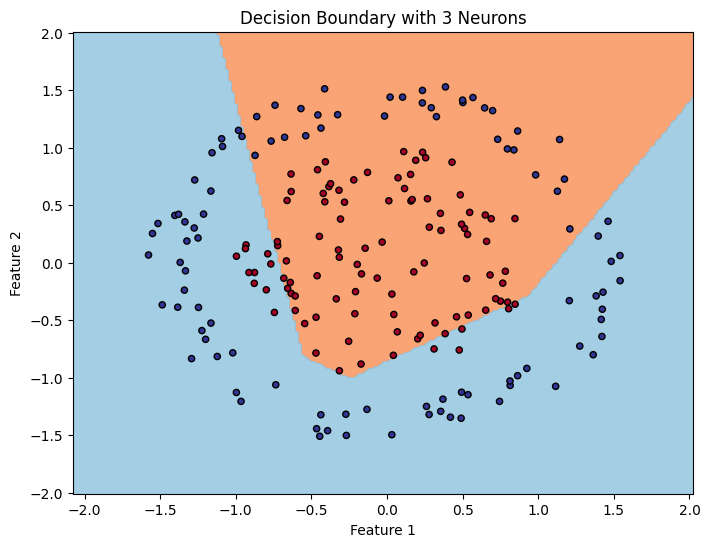

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


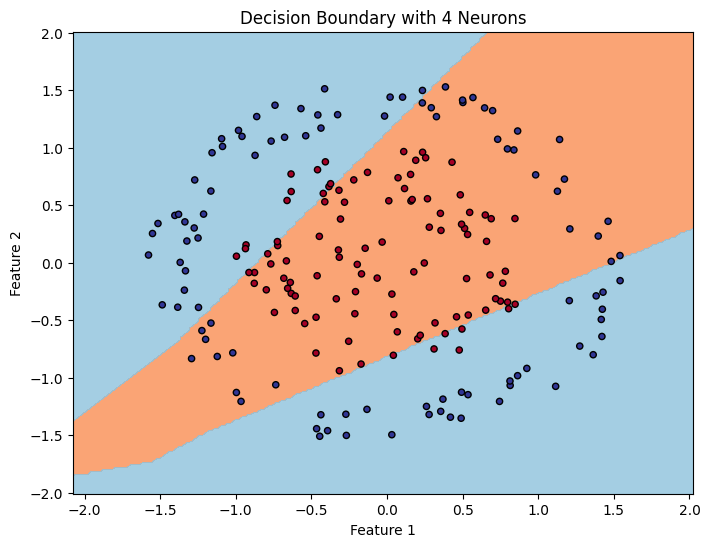

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


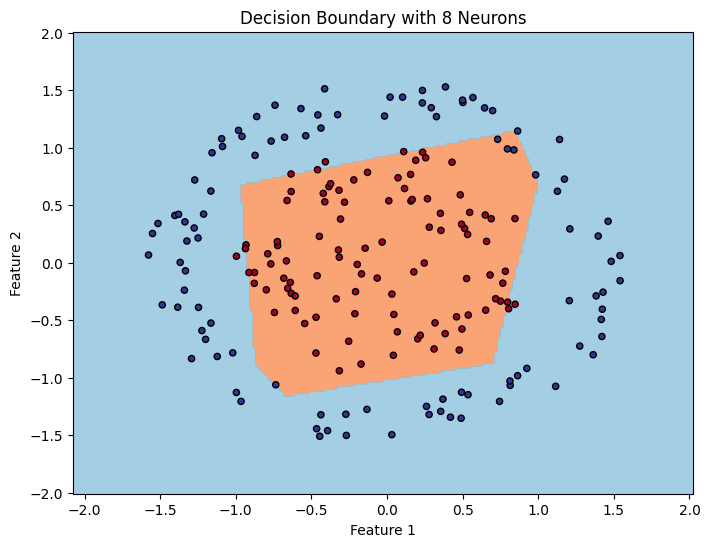

In [5]:
# List of neuron counts
neuron_counts = [3, 4, 8]

for neurons in neuron_counts:
    # Initialize the MLPClassifier with the specified number of neurons
    clf = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000, random_state=1)

    # Train the model
    clf.fit(X, y)

    # Plot the decision boundary
    plot_decision_boundary(clf, X, y, f'Decision Boundary with {neurons} Neurons')